In [1]:
import cv2
print(cv2.__version__)

4.2.0


In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

[(44, 3095, 1, 1),
 (4005, 3094, 3, 2),
 (68, 3094, 4, 2),
 (48, 3092, 11, 4),
 (4015, 3091, 9, 5),
 (3999, 3091, 4, 2),
 (82, 3091, 4, 2),
 (4026, 3090, 10, 6),
 (4020, 3087, 4, 3),
 (52, 3087, 5, 3),
 (4039, 3085, 4, 2),
 (4029, 3085, 2, 1),
 (4025, 3085, 2, 1),
 (60, 3085, 12, 11),
 (47, 3082, 5, 7),
 (4055, 3080, 3, 7),
 (53, 3079, 4, 7),
 (42, 3075, 8, 7),
 (4039, 3074, 9, 6),
 (4050, 3072, 6, 8),
 (72, 3072, 1, 1),
 (4042, 3066, 8, 9),
 (52, 3062, 4, 4),
 (35, 3062, 1, 1),
 (4027, 3061, 2, 3),
 (4061, 3058, 2, 2),
 (53, 3058, 2, 2),
 (4052, 3057, 7, 5),
 (4049, 3056, 3, 2),
 (4061, 3053, 3, 3),
 (33, 3043, 1, 2),
 (35, 3038, 2, 3),
 (46, 3030, 2, 1),
 (4074, 3028, 5, 4),
 (33, 3024, 1, 1),
 (39, 3021, 1, 3),
 (23, 3019, 4, 5),
 (4074, 3017, 1, 2),
 (4070, 3016, 1, 2),
 (25, 3010, 4, 7),
 (33, 3009, 2, 5),
 (56, 3005, 1, 1),
 (4078, 3001, 2, 1),
 (25, 3000, 3, 5),
 (0, 2996, 41, 100),
 (0, 2986, 12, 10),
 (20, 2983, 3, 4),
 (9, 2979, 6, 1),
 (0, 2979, 15, 12),
 (4082, 2975, 2, 4),

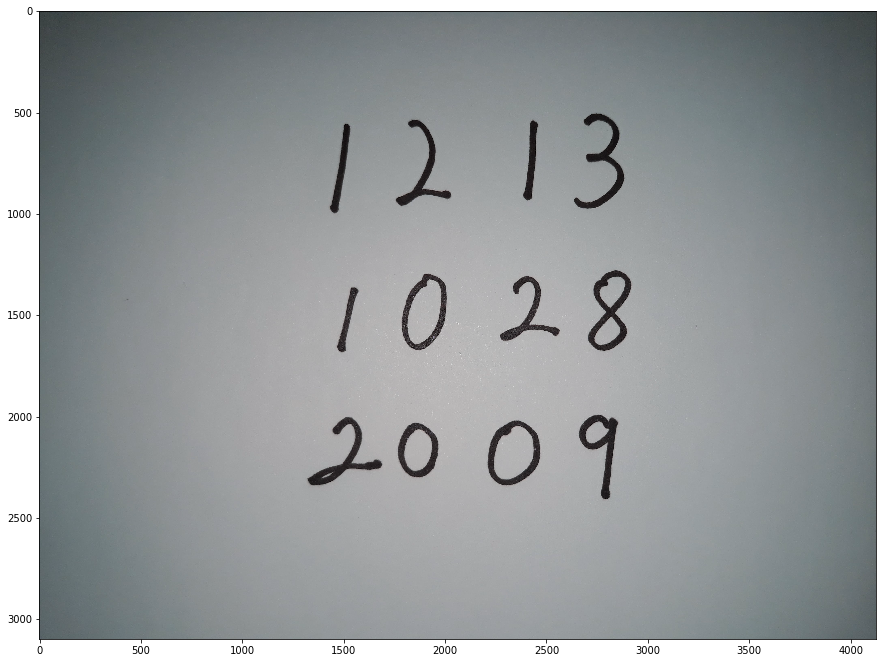

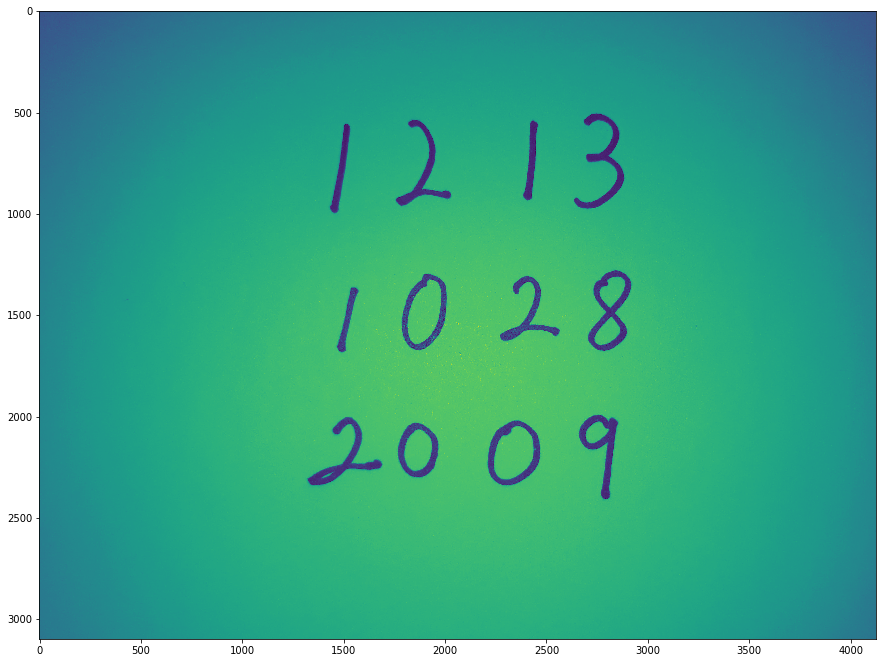

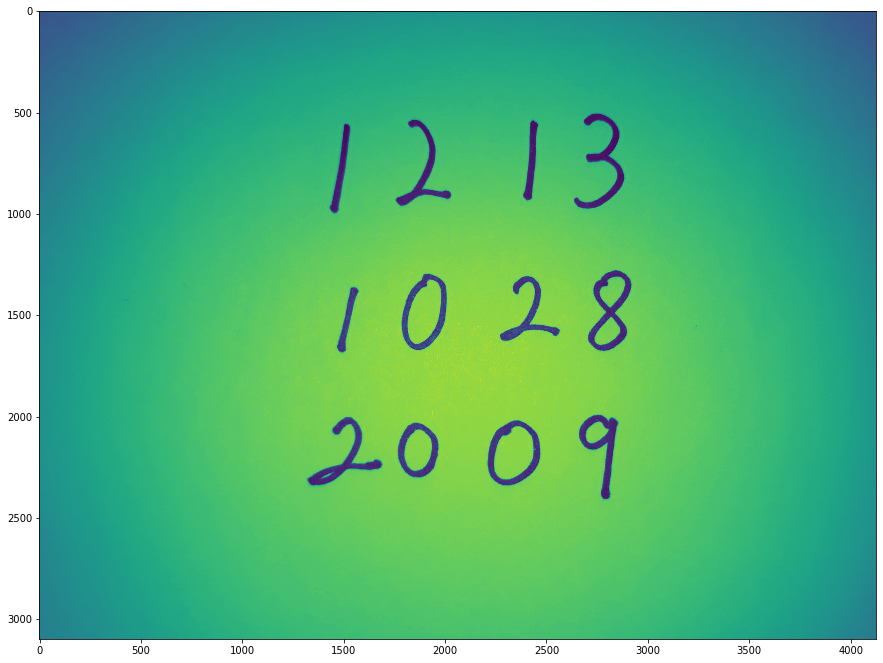

In [3]:
img = cv2.imread("./nums/300.jpg")

plt.figure(figsize=(15,12))
plt.imshow(img)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15,12))
plt.imshow(img_gray)

img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)
plt.figure(figsize=(15,12))
plt.imshow(img_blur)

# 적당한 threshold 값을 찾아서
ret, img_th = cv2.threshold(img_blur, 100, 230, cv2.THRESH_BINARY_INV)

#image, contours, hierachy = cv2.findContours(img_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours, hierachy = cv2.findContours(img_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

rects = [cv2.boundingRect(each) for each in contours]
rects

In [4]:
tmp = [w*h for (x,y,w,h) in rects]
tmp.sort()
tmp

# 제일 큰 아이 두개를 빼고, 나머지의 넓이를 찾을 수 있습니다. 그래서 넓이값으로 다시 한 번 더 걸러주는거죠...
rects = [(x,y,w,h) for (x,y,w,h) in rects if ((w*h>15000)and(w*h<500000))]
rects

[(1771, 2030, 199, 269),
 (2212, 2019, 261, 319),
 (1326, 2003, 366, 335),
 (2663, 1991, 192, 415),
 (1471, 1362, 104, 320),
 (2274, 1307, 295, 318),
 (1788, 1296, 222, 376),
 (2709, 1278, 213, 397),
 (1434, 556, 102, 440),
 (2388, 538, 74, 396),
 (1760, 535, 273, 426),
 (2639, 504, 248, 470)]

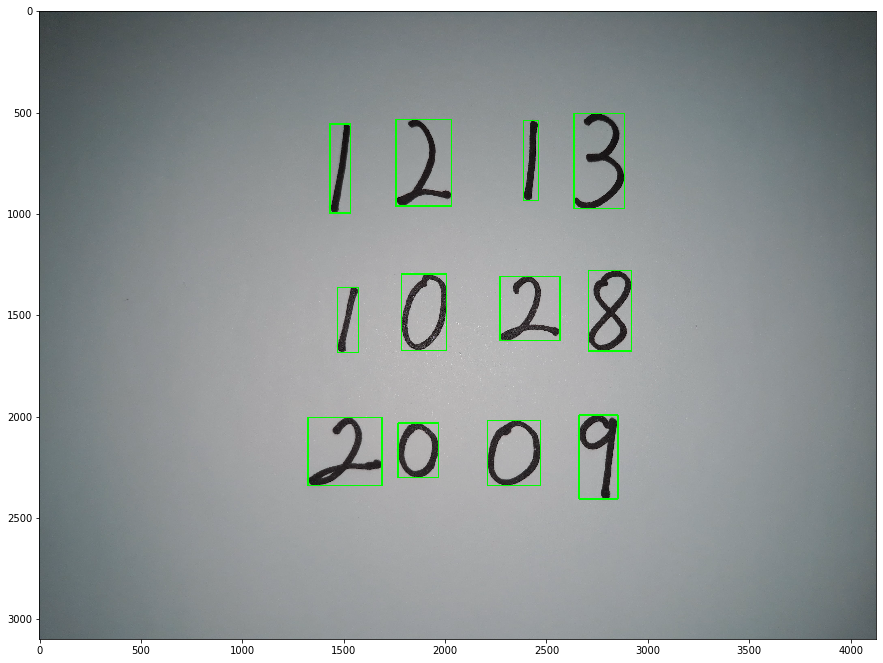

In [5]:
img_result = []
img_for_class = img.copy()

margin_pixel = 60

for rect in rects:
    #[y:y+h, x:x+w]
    img_result.append(
        img_for_class[rect[1]-margin_pixel : rect[1]+rect[3]+margin_pixel, 
                      rect[0]-margin_pixel : rect[0]+rect[2]+margin_pixel])
    
    # Draw the rectangles
    cv2.rectangle(img, (rect[0], rect[1]), 
                  (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 5)

plt.figure(figsize=(15,12))
plt.imshow(img)

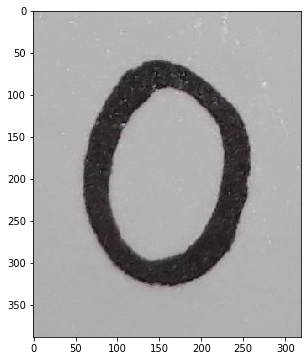

In [6]:
plt.figure(figsize=(8,6))
plt.imshow(img_result[0])

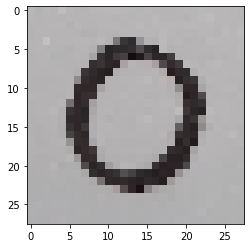

In [7]:
plt.figure(figsize=(4,4))
plt.imshow(cv2.resize(img_result[0], (28,28)))

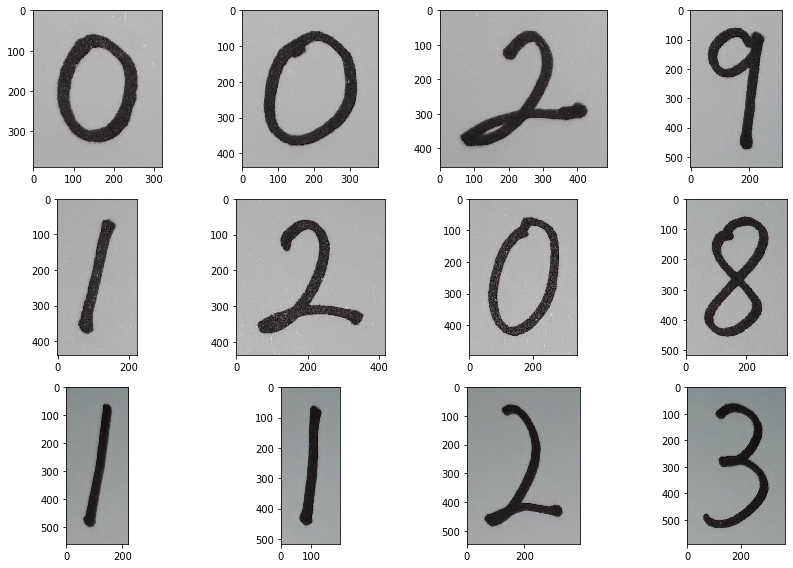

In [8]:
count = 0
nrows = 3
ncols = 4

plt.figure(figsize=(12,8))

for n in img_result:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(n, cmap='Greys', interpolation='nearest')

plt.tight_layout()
plt.show()

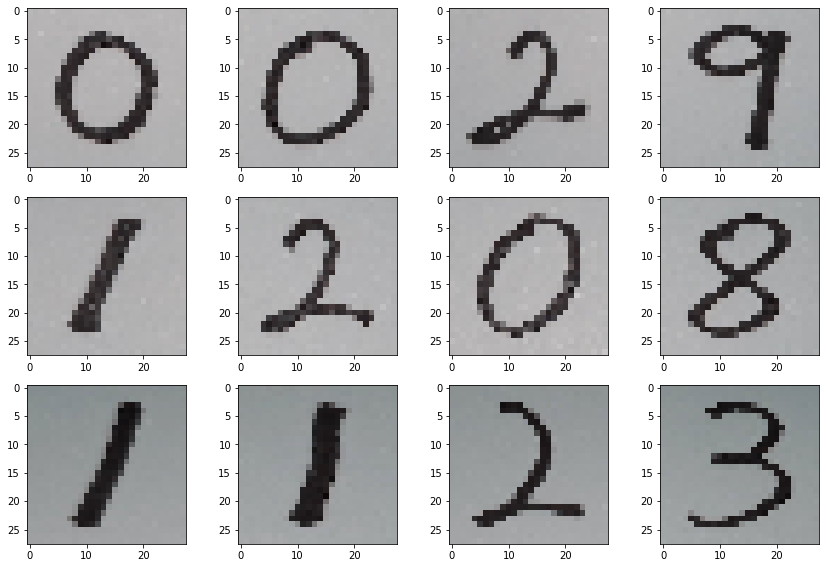

In [9]:
count = 0
nrows = 3
ncols = 4

plt.figure(figsize=(12,8))

for n in img_result:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(cv2.resize(n,(28,28)), cmap='Greys', interpolation='nearest')

plt.tight_layout()
plt.show()

In [10]:
# 모델 불러오기
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
import tensorflow as tf
import keras
from keras.models import load_model

model = load_model('mnist_mlp_model.h5')

model.summary()

Using TensorFlow backend.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


ValueError: Error when checking input: expected dense_1_input to have 2 dimensions, but got array with shape (1, 28, 28, 1)

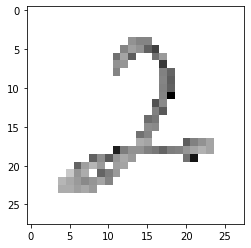

In [12]:
test_num = cv2.resize(img_result[2], (28,28))[:,:,1]
test_num = (test_num < 70) * test_num
test_num = test_num.astype('float32') / 255.

plt.imshow(test_num, cmap='Greys', interpolation='nearest');

test_num = test_num.reshape((1, 28, 28, 1))

print('The Answer is ', model.predict_classes(test_num))

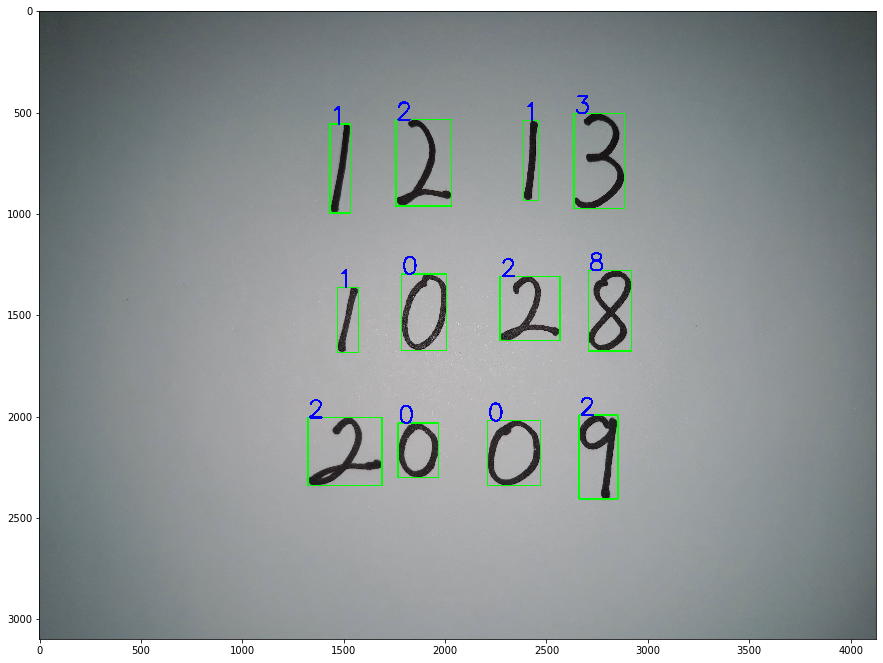

In [54]:
img_result = []
img_for_class = img.copy()

margin_pixel = 60

for rect in rects:
    #[y:y+h, x:x+w]
    target_num = img_for_class[rect[1]-margin_pixel : rect[1]+rect[3]+margin_pixel,
                               rect[0]-margin_pixel : rect[0]+rect[2]+margin_pixel]
    test_num = cv2.resize(target_num, (28,28))[:,:,1]
    test_num = (test_num < 70) * test_num
    test_num = test_num.astype('float32') / 255.
    test_num = test_num.reshape((1, 28, 28, 1))
    predicted_num = model.predict_classes(test_num)
    
    # Draw the rectangles
    cv2.rectangle(img, (rect[0], rect[1]), 
                  (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 5) 
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, str(predicted_num[0]), (rect[0],rect[1]), font, 4, (0,0,255), 10)

plt.figure(figsize=(15,12))
plt.imshow(img)